# TP Final: Spotify (17Co2024)

#### Integrantes
- Adassus, Luciano
- De Pedro Mermier, Ignacio
- Cagua, Johnatan

---

# Propuesta de investigación

#### Objetivo:
Estimar la probabilidad de que una nueva canción sea del agrado de un usuario, basado en las características de su playlist actual.

#### Contexto:
En este análisis, la variable objetivo **`label`** representa la preferencia del usuario por una canción. Esta será la variable de salida que deseamos predecir a partir de una serie de características musicales como **acousticness**, **danceability**, **energy**, **loudness**, **loudness**, **instrumentalness** entre otras variables relacionadas a la musica.

# Exploración y Comprensión de los Datos

### Primeras observaciones del dataset

Cargamos el dataset y observamos sus primeras filas para familiarizarnos con su estructura.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Pre-processing y metricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

#Modelos
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

#PCA
from sklearn.decomposition import PCA

from collections import Counter
from IPython.display import Markdown, display
import requests



In [79]:
# Cargar el dataset
spotify_df = pd.read_csv("data_playlist.csv")

# Obtener el número de observaciones (filas) y variables (columnas)
num_observaciones = spotify_df.shape[0]
num_variables = spotify_df.shape[1]

# Contar el número de variables de cada tipo (ej: float64, int64)
tipos_de_datos = spotify_df.dtypes.value_counts()

# Crear la descripción incial del dataset
descripcion = f"""
El dataset cargado tiene las siguientes características principales:

- **Número de observaciones:** {num_observaciones}
- **Número de variables:** {num_variables}

Tipos de datos:
"""
for tipo, cantidad in tipos_de_datos.items():
    descripcion += f"- La mayoría de las variables son de tipo **{tipo}** ({cantidad} variables).\n"

# Mostrar el resultado como Markdown
display(Markdown(descripcion))


El dataset cargado tiene las siguientes características principales:

- **Número de observaciones:** 750
- **Número de variables:** 14

Tipos de datos:
- La mayoría de las variables son de tipo **float64** (9 variables).
- La mayoría de las variables son de tipo **int64** (5 variables).


---
#### Aquí se muestran las rimeras 15 observaciones del dataset para tener una idea inicial de las características de las canciones:

In [80]:
spotify_df.head(15)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.7130,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.1920,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.3330,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.6010,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.8830,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.5240,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.5970,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.4520,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.7480,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.9130,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


---
#### Aqui se muestran las ultimas 15 observaciones del dataset para tener una idea inicial de las características de las canciones:

In [81]:
spotify_df.tail(15)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
735,0.019000,0.429,184753,0.760,0.000000,7,0.1020,-5.434,1,0.3270,78.260,4,0.541,0
736,0.001160,0.601,148125,0.990,0.520000,6,0.1240,-3.016,1,0.3370,127.958,4,0.192,0
737,0.905000,0.579,101148,0.221,0.000001,0,0.1020,-9.664,1,0.0478,118.871,3,0.221,1
738,0.379000,0.503,233560,0.618,0.000000,7,0.1140,-6.060,0,0.0299,81.907,4,0.232,1
739,0.102000,0.803,216575,0.631,0.000007,8,0.0858,-4.213,1,0.0444,104.999,4,0.659,0
740,0.202000,0.755,216450,0.577,0.000000,3,0.2340,-7.549,1,0.1570,100.034,4,0.451,0
741,0.162000,0.710,309173,0.784,0.000623,0,0.1940,-6.865,1,0.0416,126.656,4,0.901,1
742,0.195000,0.887,231733,0.682,0.050300,4,0.0623,-7.795,1,0.0436,115.700,4,0.962,1
743,0.125000,0.480,110075,0.560,0.000000,1,0.1360,-7.868,1,0.3510,204.162,4,0.571,1
744,0.124000,0.519,242227,0.495,0.006260,6,0.1830,-11.002,0,0.1010,95.078,4,0.262,1


---
#### Aquí se muestra una descripción de cada columna e información general del dataframe: 

In [82]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


---
#### Valores nulos y duplicados

In [83]:
spotify_df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

> El dataset no presenta valores nulos, por lo que no es necesario utilizar técnicas de imputación de variables en este caso.

In [84]:
spotify_df.duplicated().sum()

14

In [85]:
spotify_df[spotify_df.duplicated()]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
83,0.046900,0.311,208467,0.3250,0.000000,2,0.1390,-9.042,1,0.0283,65.090,1,0.668,1
151,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
233,0.992000,0.525,228253,0.0553,0.933000,2,0.0934,-22.358,1,0.0633,67.325,4,0.256,1
263,0.025400,0.541,205200,0.8540,0.000125,2,0.6510,-6.196,1,0.1550,86.044,4,0.454,0
297,0.992000,0.525,226293,0.0633,0.905000,9,0.1050,-23.072,1,0.0497,71.855,4,0.297,1
301,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
426,0.182000,0.874,216248,0.7060,0.000000,1,0.3340,-5.132,1,0.2070,89.968,4,0.895,0
450,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1
537,0.137000,0.666,211931,0.9480,0.000000,10,0.1920,-2.776,1,0.0638,100.996,4,0.523,0
542,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1


# Análisis de las Variables

| Variable            | Tipo        | Descripción                                                                 |
|---------------------|-------------|-----------------------------------------------------------------------------|
| **acousticness**     | Continua    | Atributo que mide qué tan acústica es una canción.                          |
| **danceability**     | Continua    | Mide lo apta que es una canción para bailar.                                |
| **duration**         | Discreta    | Duración de una canción en milisegundos.                                    |
| **energy**           | Continua    | Mide la intensidad y actividad percibida de la canción.                     |
| **instrumentalness** | Continua    | Indica la probabilidad de que una pista no contenga voces.                  |
| **key**              | Discreta    | Representa la tonalidad musical de una canción (en semitonos).              |
| **liveness**         | Continua    | Detecta la presencia de una audiencia en la grabación.                      |
| **loudness**         | Continua    | Mide el volumen medio de la canción (en decibelios).                        |
| **mode**             | Binaria     | Indica si una pista está en modo mayor (1) o menor (0).                     |
| **speechiness**      | Continua    | Mide la cantidad de palabras habladas en la pista.                          |
| **tempo**            | Continua    | Mide el ritmo de la canción en beats por minuto (BPM).                      |
| **time_signature**   | Ordinal     | Representa la métrica de la canción (por ejemplo, 4/4).                     |
| **valence**          | Continua    | Mide el carácter musical de una pista en términos de positividad.           |
| **label**            | Binaria     | Variable objetivo que se desea predecir.                                    |

---

## Clasificación de Variables

#### 1. **Variables Numéricas**:
Estas variables son cuantitativas y se dividen en **discretas** y **continuas**.

##### **Lista de Variables Numéricas**:
- **Continuas**:
  - `acousticness`, `danceability`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo`, `valence`  
- **Discretas**:
  - `duration`

##### **Análisis**:
- **Tipo**: Continuas y discretas.
- **Distribución de los datos**:
  - Utilizar **histogramas** para visualizar la distribución de cada variable.
  - Usar medidas como la **media**, **mediana**, **desviación estándar** y **percentiles**.
- **Conclusiones esperadas**:
  - Identificar **distribuciones simétricas**, **sesgadas** o la presencia de **valores atípicos (outliers)**.
  
##### **Gráficos sugeridos para Variables Numéricas**:
- **Histogramas**: Para visualizar la distribución de los datos y observar si son simétricos o sesgados.
- **Boxplots**: Para identificar la presencia de valores atípicos y comparar distribuciones.
  
---

#### 2. **Variables Categóricas**:
Estas variables agrupan los datos en categorías y se dividen en **nominales**, **ordinales** y **binarias**.

##### **Lista de Variables Categóricas**:
- **Nominales**:
  - `key`, `mode`  
- **Ordinales**:
  - `time_signature`  
- **Binarias**:
  - `label`

##### **Análisis**:
- **Tipo**: Nominales, ordinales y binarias.
- **Cardinalidad**:
  - Evaluar el número de categorías presentes en cada variable y su **frecuencia**.
  - Identificar si hay **categorías comunes** o **raras**.
- **Representación**:
  - Usar **gráficos de barras** o **countplots** para visualizar la distribución de las categorías.
- **Conclusiones esperadas**:
  - Determinar si algunas categorías son demasiado **raras** o **comunes**, lo que podría impactar en el modelo.
  - Evaluar si las variables categóricas tienen una **distribución uniforme** o están desbalanceadas.

##### **Gráficos sugeridos para Variables Categóricas**:
- **Gráficos de barras**: Para mostrar la frecuencia de cada categoría.
- **Countplots**: Para contar y visualizar la frecuencia de las categorías.

---

### Resumen de Gráficos Sugeridos

#### **Variables Numéricas**:
- **Histogramas**: Para observar la **distribución** de cada variable numérica y detectar si hay sesgo.
- **Boxplots**: Para detectar **valores atípicos** en las variables numéricas y comparar su rango.

#### **Variables Categóricas**:
- **Gráficos de barras** o **countplots**: Para visualizar la **frecuencia de categorías** en las variables categóricas.



### Estadísticas Resumidas de las variables

A continuación se presentan las estadísticas descriptivas de las variables, que incluyen la media, desviación estándar, cuartiles, y valores mínimo y máximo. Estas estadísticas nos permiten comprender mejor la distribución general de los datos.

In [86]:
spotify_df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


### Target
Nuestro objetivo va a ser predecir si una canción es del agrado del usuario. Para eso, revisamos la distribución de la variable objetivo label (canciones preferidas (1) y no preferidas (0))

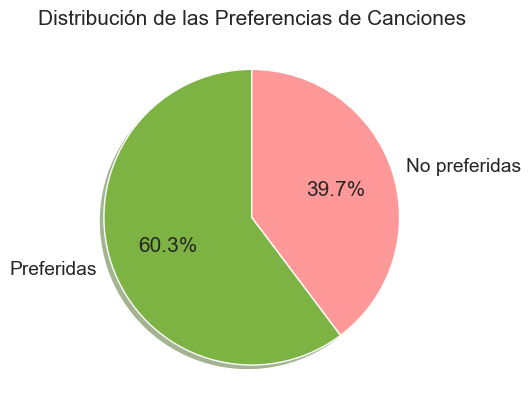

In [104]:
# Paleta de colores para los gráficos
palette = {
    0: '#ff9999',  # Rojo
    1: '#7CB342',   # Verde
    -1: '#ffff99'   # Amarillo
}

target_esn = {
    0: 'Preferidas',
    1: 'No preferidas'
}

fig, ax = plt.subplots()
ax.pie(spotify_df.label.value_counts(), 
       labels=[target_esn[0], target_esn[1]], shadow={'ox': -0.02, 'edgecolor': 'none', 'shade': 0.4},
       colors=[palette[1], palette[0]], autopct='%1.1f%%', startangle=90)
plt.title("Distribución de las Preferencias de Canciones")
plt.show()

### Visualización de Distribuciones para la Variables Numéricas

Utilizamos histogramas y boxplots para visualizar las distribuciones y posibles valores atípicos.

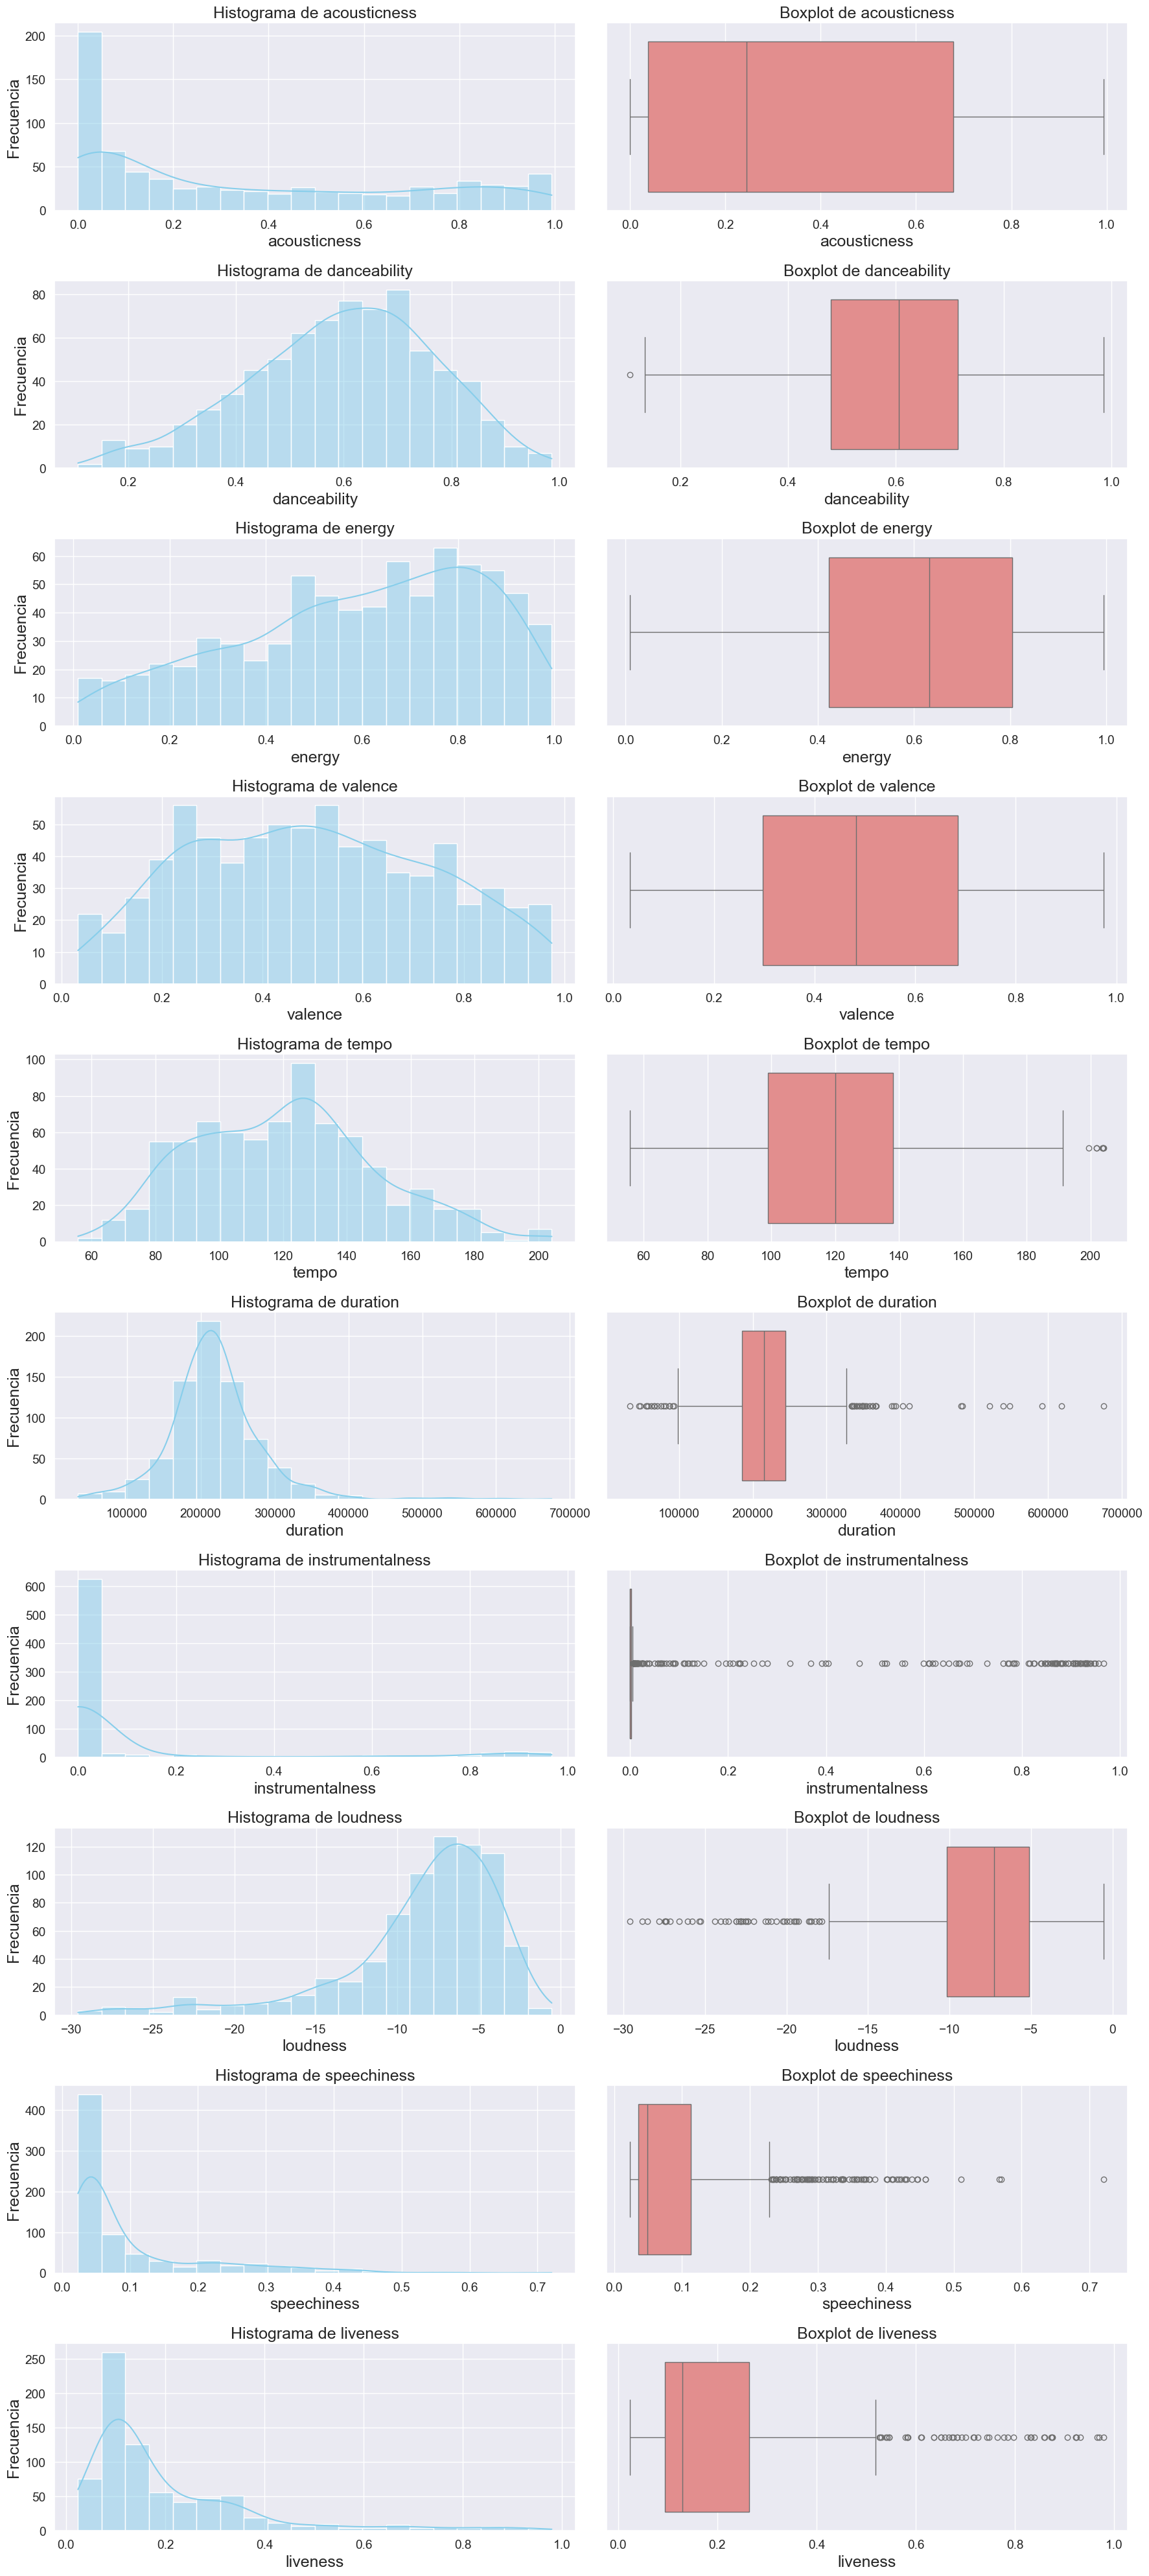

In [105]:
# Variables numéricas
variables_numericas = ['acousticness', 'danceability', 'energy', 'valence', 'tempo', 'duration', 
                       'instrumentalness', 'loudness', 'speechiness', 'liveness']

# Aumentar el tamaño de la figura
plt.figure(figsize=(18, 40))  # Aumentar un poco más el tamaño de los gráficos

for i, variable in enumerate(variables_numericas, 1):
    # Histograma
    plt.subplot(10, 2, i*2-1)
    sns.histplot(spotify_df[variable], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {variable}', fontsize=18)  # Aumentar el tamaño del título
    plt.xlabel(variable, fontsize=18)  # Aumentar el tamaño del eje X
    plt.ylabel('Frecuencia', fontsize=18)  # Aumentar el tamaño del eje Y
    
    # Boxplot
    plt.subplot(10, 2, i*2)
    sns.boxplot(x=spotify_df[variable], color='lightcoral')
    plt.title(f'Boxplot de {variable}', fontsize=18)  # Aumentar el tamaño del título
    plt.xlabel(variable, fontsize=18)  # Aumentar el tamaño del eje X

# Añadir espacio entre las filas
plt.subplots_adjust(hspace=0.6)  # Ajusta el espacio entre filas (0.6 para mayor separación)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

#### Conclusión de los Gráficos para las Variables Numéricas

- **Acousticness**: La mayoría de las canciones tienen valores bajos de acústica, pero se observan algunas con valores más altos. El boxplot muestra pocos valores atípicos.
- **Danceability**: Muchas canciones tienen una alta bailabilidad, con un pico entre 0.5 y 0.7. El boxplot muestra que la distribución está centrada alrededor de la mediana.
- **Energy**: La energía de las canciones tiende a concentrarse en valores medios a altos, y el boxplot muestra una distribución razonablemente uniforme.
- **Valence**: La positividad de las canciones está distribuida de manera uniforme, pero con un ligero aumento hacia valores más bajos.
- **Tempo**: La mayoría de las canciones están en el rango de 90-150 BPM, lo que sugiere un tempo promedio.
- **Duration**: Las canciones tienden a durar entre 150,000 y 250,000 milisegundos (2.5 a 4 minutos), con algunos valores atípicos.
- **Instrumentalness**: La mayoría de las canciones no son instrumentales, con valores cercanos a cero.
- **Loudness**: Los niveles de volumen varían, pero las canciones suelen estar en un rango de volumen moderado, sin demasiados outliers.
- **Speechiness**: La mayoría de las canciones tienen poca o ninguna cantidad de palabras habladas.
- **Liveness**: La mayoría de las canciones tienen poca o ninguna presencia de público en la grabación.

### Visualización de Distribuciones para la Variables Categoricas

Usamos gráficos de barras para mostrar la distribución de las categorías.

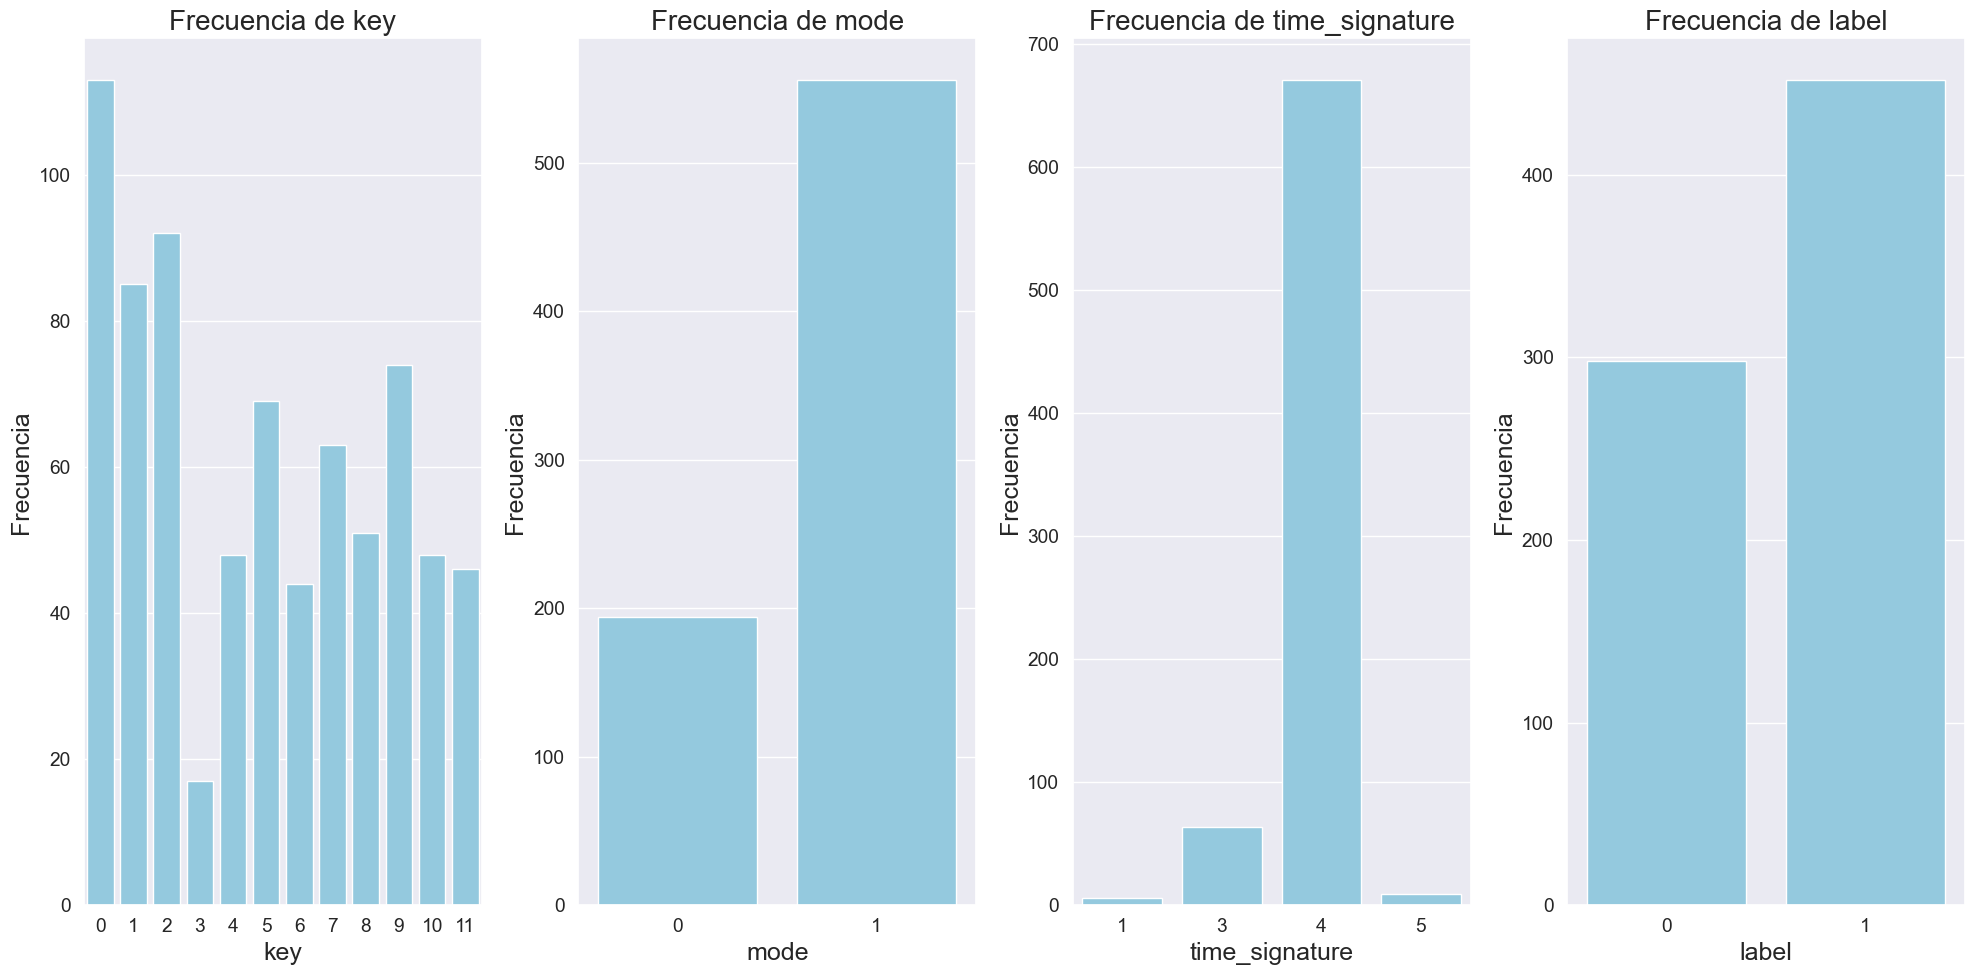

In [106]:
# Variables categóricas
variables_categoricas = ['key', 'mode', 'time_signature', 'label']

# Crear un gráfico para cada variable categórica con gráficos y letras más grandes
plt.figure(figsize=(20, 10))  # Aumentar el tamaño general de la figura

for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=variable, data=spotify_df, color='skyblue')
    plt.title(f'Frecuencia de {variable}', fontsize=20)  # Aumentar el tamaño del título
    plt.xlabel(variable, fontsize=18)  # Aumentar el tamaño del eje X
    plt.ylabel('Frecuencia', fontsize=18)  # Aumentar el tamaño del eje Y

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

#### Conclusión de los Gráficos para las Variables Categóricas

- **Key**: La variable key, que representa la nota principal de la canción, está distribuida uniformemente entre varios valores. No hay claves que dominen significativamente sobre otras.
- **Mode**: La mayoría de las canciones están en **modo mayor** (representado por el valor de 1), lo cual es común en muchas canciones comerciales.
- **Time Signature**: La mayoría de las canciones tienen un compás de **4 tiempos**, lo cual es el estándar en la mayoría de las canciones pop y mainstream.

### Visualización de Características por Categoría
Se muestran distribuciones utilizando la variable el label (cancion que es preferencia del usuario, cancion que no es preferencia del usuario) como separador.

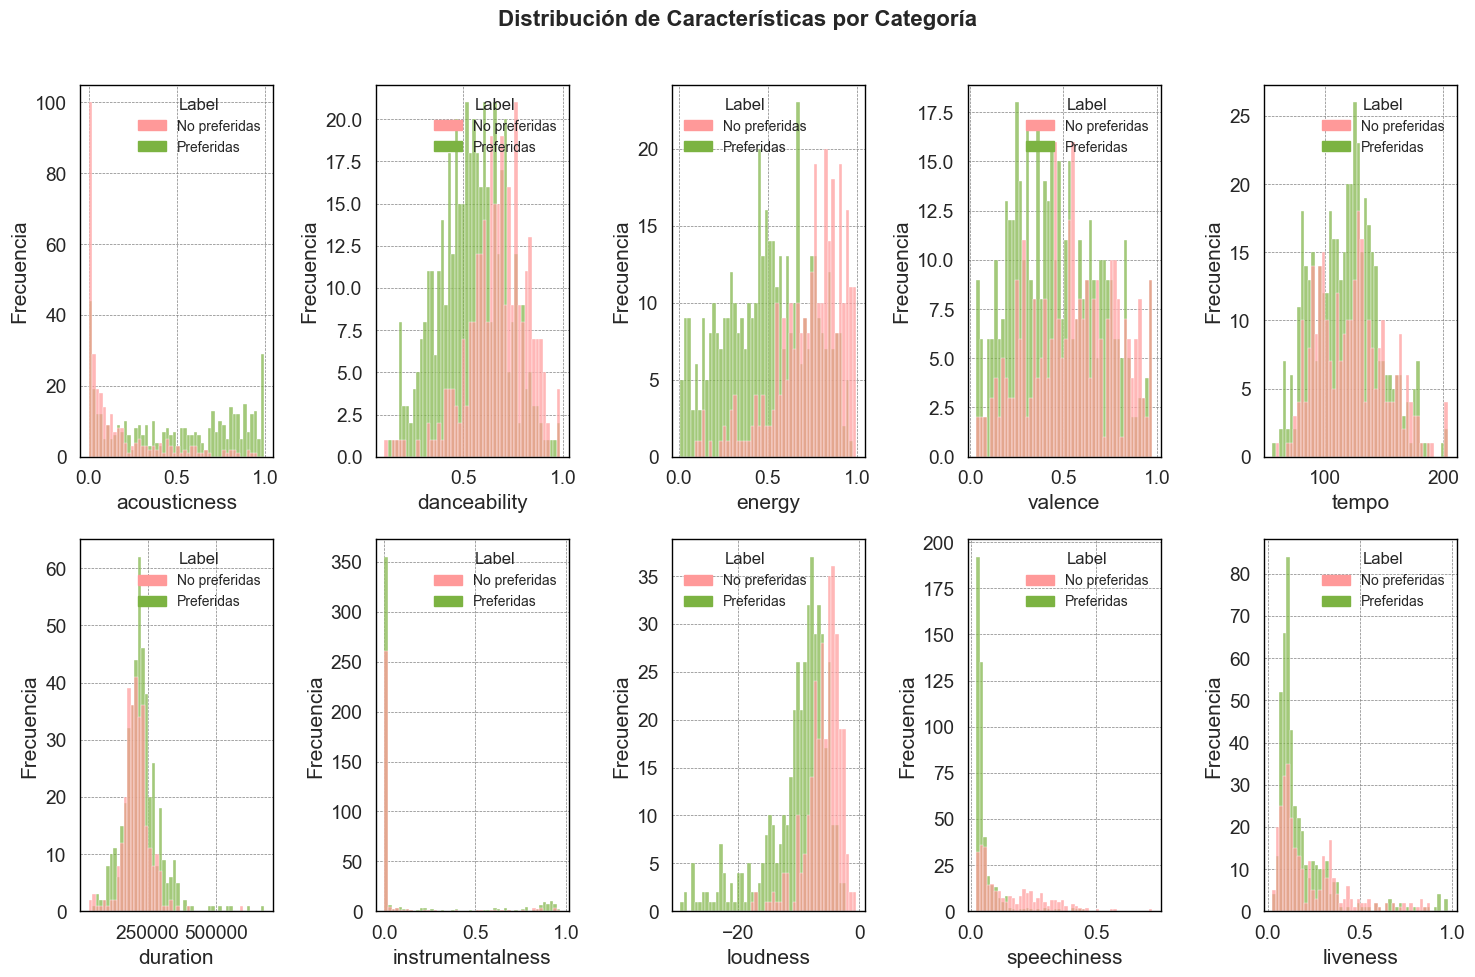

In [107]:
import matplotlib.patches as patches

# Número de columnas
n_columns = 5
# Calcular el número de filas necesario
n_rows = (len(variables_numericas) + n_columns - 1) // n_columns  

# Crear la figura y los ejes para la cuadrícula de histogramas
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5 * n_rows), squeeze=False)

fig.suptitle('Distribución de Características por Categoría', fontsize=16, fontweight='bold')

# Graficar histogramas según target
for idx, feature in enumerate(variables_numericas):
    row = idx // n_columns
    col = idx % n_columns
    ax = axes[row, col]
    
    sns.histplot(data=spotify_df, x=feature, hue='label', bins=50, alpha=0.7, palette=palette, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frecuencia')
    
    handles = [patches.Patch(color=palette[0], label=target_esn[1]), patches.Patch(color=palette[1], label=target_esn[0])]
    legend = ax.legend(handles=handles, title='Label', fontsize=10, title_fontsize=12)
    
    ax.set_facecolor('#ffffff')  # Fondo blanco para el área de trazado
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  # Borde negro en el área de trazado
        spine.set_linewidth(1)  # Grosor del borde del área de trazado
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    
    legend.set_frame_on(False)  # Habilitar el marco de la leyenda
    legend.get_frame().set_edgecolor('black')  # Color del borde de la leyenda
    legend.get_frame().set_linewidth(1)  # Grosor del borde de la leyenda

# Eliminar ejes vacíos si hay menos gráficos que subplots
for idx in range(len(variables_numericas), n_rows * n_columns):
    row = idx // n_columns
    col = idx % n_columns
    fig.delaxes(axes[row, col])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.97]) 

plt.show()

### Conclusiones

Se puede observar algunas cualidades segun el feature a analizar:
- **Acousticness:** Generalmente prefieren valores de acousticness alto, mientras que no prefieren canciones con acousticness bajo.
- **Danceability:** La media de las canciones que son preferencia es menor que la media de las canciones que no son preferidas.
- **Energy:** La distribucion de las canciones que prefieren suele tener una tendencia más uniforme, mientras que las canciones que no prefieren se concentran en valores cercanos a 1.
- **Loudness:** La media de canciones que prefieren tienden a los -10dB (menor volumen) mientras que la media de las canciones que no prefieren tienen a los -5dB (más volumen).
- **Speechiness:** Las canciones que prefieren están mas concentradas en valores bajos de speechines mientras que las canciones que no prefieren tienen a estar más distribuídas dentro del rango de posibles variables.

### Análisis de Correlación

Se genera una matriz de correlación para identificar relaciones importantes entre las variables.

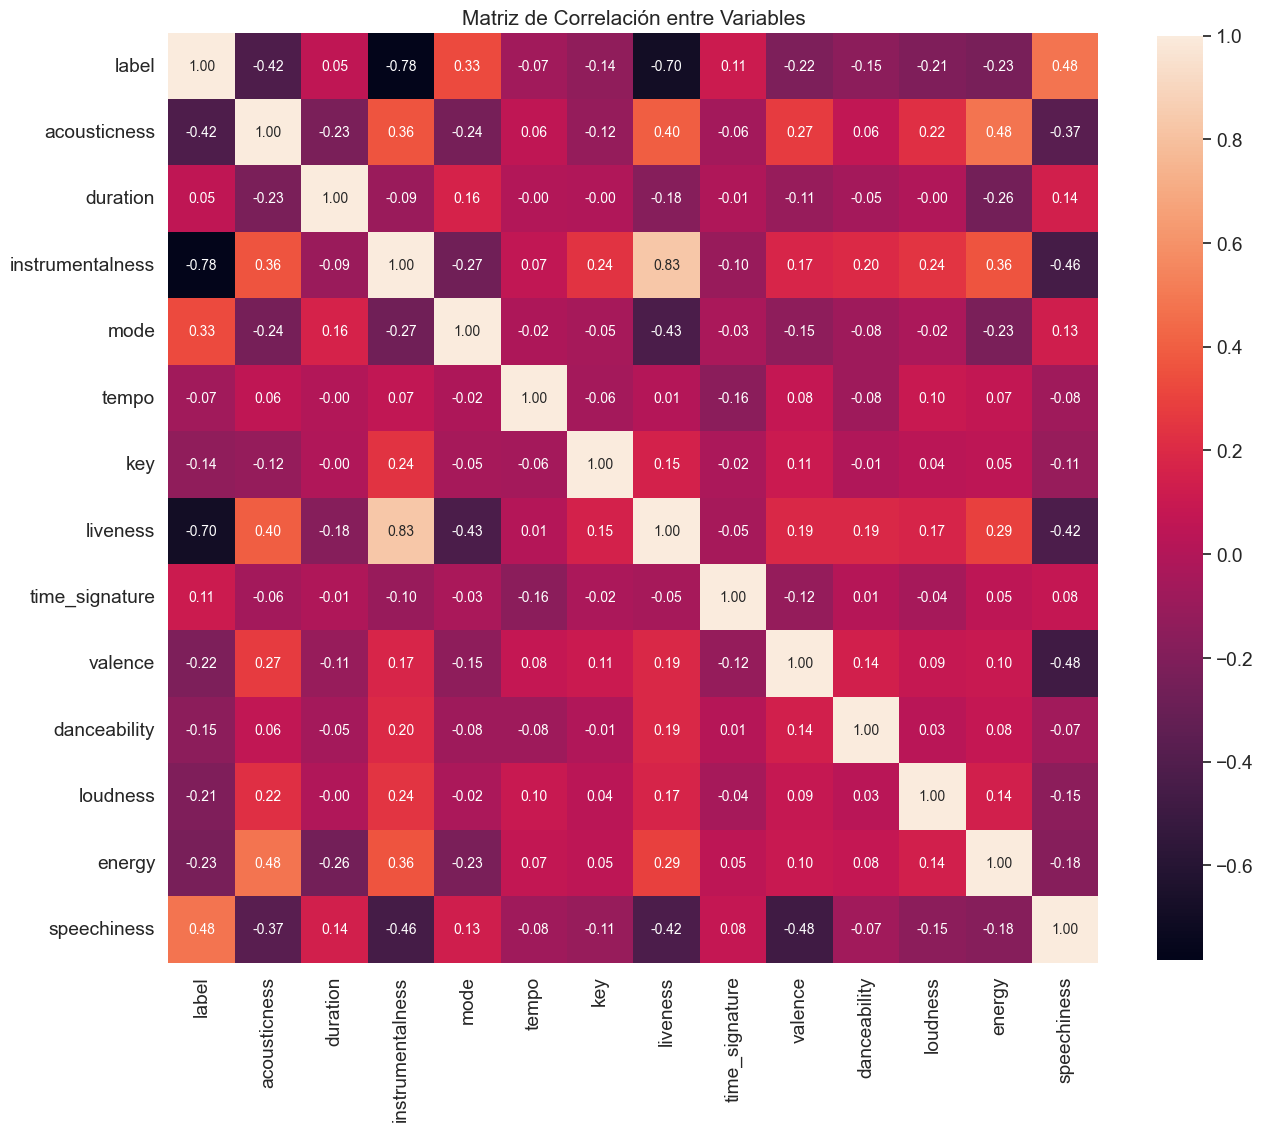

In [91]:
# Generar la matriz de correlación
correlation_matrix = spotify_df.corr()

# Generar una máscara para el triángulo superior (opcional)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
k = 18
cols = correlation_matrix.nlargest(k, 'label')['label'].index
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15,15))  
hm = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, cbar_kws={"shrink": 0.80},
                 yticklabels=cols.values, xticklabels=cols.values)

plt.title('Matriz de Correlación entre Variables')
plt.show()

#### Interpretación de la Matriz de Correlación:

El mapa de calor muestra las correlaciones entre las variables del dataset. Las relaciones más relevantes observadas son:

- **Energy** y **Loudness** tienen una correlación positiva moderada. Esto sugiere que las canciones más enérgicas tienden a ser más fuertes, lo cual es intuitivo, ya que las canciones con mayor energía suelen tener mayor volumen para resaltar su intensidad.
  
- **Danceability** y **Valence** también muestran una correlación positiva moderada. Esto indica que las canciones que son más alegres (valence) tienden a ser más fáciles de bailar (danceability). Las canciones con un estado emocional positivo parecen estar diseñadas para promover una mayor interacción física, como el baile.

- **Instrumentalness** presenta una correlación negativa tanto con **Danceability** como con **Energy**. Esto podría sugerir que las canciones instrumentales suelen ser menos bailables y menos energéticas. Esto es comprensible, ya que las canciones con pocas o ninguna vocalización suelen tener un enfoque más calmado o ambiental, lo que puede hacerlas menos aptas para el baile o para transmitir altos niveles de energía.

- **Speechiness** tiene una relación positiva leve con **Valence**, lo que podría sugerir que las canciones con más contenido hablado tienden a ser ligeramente más "felices". Sin embargo, esta correlación es baja, lo que sugiere que la relación no es muy fuerte.

- **Tempo** tiene una correlación débil con la mayoría de las variables, lo que sugiere que la velocidad de la canción en sí misma no es un factor determinante en características como **danceability**, **energy**, o **valence**. Esto indica que otros elementos musicales, además del ritmo, juegan un papel más importante en la percepción de estas características.

> #### Conclusión:
La matriz de correlación ofrece una visión clara de cómo interactúan ciertas características musicales. Las correlaciones más fuertes, como entre **energy** y **loudness**, son coherentes con las expectativas sobre la música enérgica, mientras que las relaciones negativas como la de **instrumentalness** con **danceability** y **energy** revelan que las canciones más instrumentales tienden a tener un carácter más calmado y menos rítmico. Estas observaciones pueden ser clave para entender las preferencias musicales de los usuarios y mejorar las recomendaciones de canciones.

#### Selección de Variables Basadas en Correlación de Pearson:

Para mejorar el rendimiento de los modelos de machine learning, eliminaremos variables que están altamente correlacionadas. 
Definimos un umbral de correlación del 0.9 para identificar aquellas variables que comparten una cantidad significativa de información pero que no son completamente redundantes.

Variables con correlaciones en este rango pueden ser consideradas para revisión y posibles eliminaciones.

In [92]:
# Definir el umbral de correlación
correlation_threshold = 0.9

# Crear una matriz de correlación para todas las variables
correlation_matrix = spotify_df.corr()

# Encontrar las columnas que están altamente correlacionadas
# Seleccionamos las correlaciones que están por encima del umbral
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Mostrar las variables con alta correlación (por encima del umbral)
if high_correlation_pairs:
    print("Variables altamente correlacionadas (correlación > 0.9):")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} y {pair[1]}: {pair[2]:.2f}")
else:
    print("No se encontraron variables con correlación mayor a 0.9.")

# Eliminar una de las variables altamente correlacionadas (si corresponde)
variables_a_eliminar = [pair[0] for pair in high_correlation_pairs]
spotify_df_filtrado = spotify_df.drop(columns=variables_a_eliminar)

print(f"Variables eliminadas: {variables_a_eliminar}")
print(f"El dataset ahora tiene {spotify_df_filtrado.shape[1]} variables.")


No se encontraron variables con correlación mayor a 0.9.
Variables eliminadas: []
El dataset ahora tiene 14 variables.


# ACOMODAR DESDE ACA PARA ABAJO

In [16]:
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, Perceptron
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


In [17]:
"""
Dibuja la matriz de confusión del modelo
"""
def showConfMatrix(y_ts, y_pred, classes, model_name, color='Greens', n_graph=2):
    ## Matriz de confusión
    cm = confusion_matrix(y_ts, y_pred)
    
    g_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

    if n_graph == 2:
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})
        ax0.axvline(x=0.5, color='gray', linestyle='--')
        ax0.axhline(y=0.5, color='gray', linestyle='--')
        ax0.text(0.25, 0.75, 'VERDADEROS\nNEGATIVOS', fontsize=12, ha='center', va='center')
        ax0.text(0.75, 0.75, 'FALSOS\nPOSITIVOS', fontsize=12, ha='center', va='center')
        ax0.text(0.25, 0.25, 'FALSOS\nNEGATIVOS', fontsize=12, ha='center', va='center')
        ax0.text(0.75, 0.25, 'VERDADEROS\nPOSITIVOS', fontsize=12, ha='center', va='center')
        ax0.set_xlim(0, 1)
        ax0.set_ylim(0, 1)
        ax0.axis('off')
    else:
        fig, ax1 = plt.subplots(figsize=(7, 5))

    g_cm.plot(ax=ax1, cmap=color)
    ax1.set_title(model_name)
    ax1.set_xlabel('Predicción') 
    ax1.set_ylabel('Valor verdadero') 
    
    plt.tight_layout()
    plt.show()

    return cm.ravel()
    
"""
Muestra la curva ROC del modelo
Devuelve el área bajo la curva
"""

def showROC(y_ts, arr_models):

    plt.figure(figsize=(5, 5))
    auc_models = {}
    
    for model_name, color, y_probs in arr_models:
 
        fp, p, thresholds = roc_curve(y_ts, y_probs)
        plt.plot(fp, p, color=color, label=model_name)
        auc_models[model_name] = auc(fp, p)
        
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos")
    plt.title('Curva ROC')
    plt.legend()
    plt.grid(True)
    plt.show()

    return auc_models

"""
Devuelve las métricas del modelo
"""
def getMetrics(y_ts, y_pred, cm, model_name):
    
    metrics = {}
    tn, fp, fn, tp = cm
    #TN (True Negatives): Verdaderos negativos.
    #FP (False Positives): Falsos positivos.
    #FN (False Negatives): Falsos negativos.
    #TP (True Positives): Verdaderos positivos.

    metrics[model_name] = [
        # Exactitud => Proporción de instancias correctamente clasificadas 
        #(tanto positivas como negativas) respecto al total de instancias.
        ["Accuracy", round(accuracy_score(y_ts, y_pred), 4)],
        # Precisión => cuántas de las predicciones positivas 
        # del modelo son realmente correctas.
        ["Precision", round(precision_score(y_ts, y_pred, zero_division=0), 4)],
        # Especificidad => qué tan bien el modelo puede identificar las instancias negativas 
        # y evitar clasificarlas incorrectamente como positivas
        ["Specificity",  round(tn / (tn + fp), 4)],     
        # Exactitud balanceada => considera el desbalance de clases al calcular la exactitud
        ["Balanced Accuracy",  round(((tp / (tp + fn)) + (tn / (tn + fp))) / 2, 4)], 
        # Sensibilidad = Recuperación => capacidad del modelo 
        #para identificar correctamente las instancias positivas.
        ["Recall", round(recall_score(y_ts, y_pred, zero_division=0), 4)], 
        # Equilibrio entre precisión y recuperación
        ["F1-Score", round(f1_score(y_ts, y_pred, zero_division=0), 4)], 
    ]

    return metrics

def printMetrics(metrics, n, s, b):
    
    model = next(iter(metrics))
    
    df_metrics = pd.DataFrame ([model], columns=['Modelo'])

    df_metrics['Características'] = n
    df_metrics['Escalamiento'] = s
    df_metrics['Búsqueda Hp'] = b 
   
    for metric, value in metrics[model]:
        df_metrics[metric] = value
    
    return df_metrics


In [18]:
"""
Ejecuta Regresión Logística y devuelve predicciones, clases, y probabilidades
"""
def LogRegression (X_tr, y_tr, X_ts, y_ts):
    lregression = LogisticRegression(random_state = 42, class_weight="balanced")
    lregression.fit(X_tr, y_tr)

    y_pred_lr = lregression.predict(X_ts)
    y_probs_lr = lregression.predict_proba(X_ts)[:, -1]
    
    return y_pred_lr, lregression.classes_, y_probs_lr


#### Regresión Logística con ajuste de hiperparámetros

In [19]:
"""
Utiliza validación cruzada para encontrar la combinación que mejor 
optimiza el rendimiento del modelo según el criterio de evaluación dado
"""
def LogRegressionHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, max_i, p_cv, metric):

    lregression = LogisticRegression(max_iter=max_i)
    grid_search = GridSearchCV(lregression, param_grid, cv=p_cv, scoring=metric)

    grid_search.fit(X_tr, y_tr)

    # Mejor modelo
    best_model = grid_search.best_estimator_
                                   
    y_pred_lr = best_model.predict(X_ts)

    y_probs_lr = best_model.predict_proba(X_ts)[:, -1]

    # Devuelve lo mismo que la función anterior + los mejores hiperparámetros encontrados
    return y_pred_lr, best_model.classes_, y_probs_lr, best_model


### Clasificador por vectores de soporte

In [20]:
def SVCHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):

    # Support Vector Classifier
    model = SVC(probability=True)

    # Grilla de hiper-parámetros
    grid_search = GridSearchCV(model, param_grid, cv=p_cv, scoring=metric) 

    # Entrena el modelo
    grid_search.fit(X_tr, y_tr)

    # Obtiene los mejores hiper-parámetros
    best_model = grid_search.best_estimator_

    # Obtiene las predicciones en el conjunto de prueba
    y_pred_svm = best_model.predict(X_ts)

    y_probs_svm = best_model.predict_proba(X_ts)[:, -1]

    return y_pred_svm, best_model.classes_, y_probs_svm, best_model


### Árbol de Clasificación

In [21]:
def DecisionTreeHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):

    # Crea el modelo de arbol de clasificacion
    model = DecisionTreeClassifier()

    # Configura GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=p_cv, scoring=metric)

    # Entrena el modelo
    grid_search.fit(X_tr, y_tr)

    # Obtiene los mejores hiper-parametros
    best_model = grid_search.best_estimator_

    # Obtiene las predicciones en el conjunto de prueba
    y_pred_dt = best_model.predict(X_ts)

    y_probs_dt = best_model.predict_proba(X_ts)[:, -1]

    return y_pred_dt, best_model.classes_, y_probs_dt, best_model

### Clasificador KNN


In [22]:
def KnnHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):

    knn = KNeighborsClassifier()

    # Búsqueda de hiperparámetros por GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=p_cv, scoring=metric)

    grid_search.fit(X_tr, y_tr)

    # Obtener los mejores hiperparámetros
    best_model = grid_search.best_estimator_
        
    # Obtener las predicciones en el conjunto de prueba
    y_pred_knn = best_model.predict(X_ts)

    return y_pred_knn, best_model.classes_, best_model

### Perceptron

In [23]:
def PerceptronHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):

    # Crea el modelo de perceptron
    model = Perceptron()

    # Realiza la busqueda de hiperparametros con GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=p_cv, scoring=metric)

    # Entrena el modelo
    grid_search.fit(X_tr, y_tr)

    # Obtiene los mejores hiperparametros
    best_model = grid_search.best_estimator_
    
    # Obtiene las predicciones en el conjunto de prueba
    y_pred_p = best_model.predict(X_ts)

    return y_pred_p, best_model.classes_, best_model

### XGBoost

In [24]:
import xgboost as xgb
from sklearn.metrics import (mean_absolute_error, r2_score,
                             root_mean_squared_error, 
                             mean_absolute_percentage_error)

def PerceptronHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):


    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

    
    # Realiza la busqueda de hiperparametros con GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=p_cv, scoring=metric)

    # Entrena el modelo
    grid_search.fit(X_tr, y_tr)

    # Obtiene los mejores hiperparametros
    best_model = grid_search.best_estimator_
    
    # Obtiene las predicciones en el conjunto de prueba
    y_pred_p = best_model.predict(X_ts)

    return y_pred_p, best_model.classes_, best_model





In [25]:
#Funcion auxiliar para obtener métricas y comparar más fácilmente cada modelo
def obtener_metricas(df, nombre_modelo, y_test,y_predicted,tolerancia=2,unlog=True,display_results=True,replace_result=False):
    """Funcion auxiliar para obtener métricas y comparar más fácilmente cada modelo."""

    # Calculamos error del modelo (MAE,MSE,R2,etc)
    mae = mean_absolute_error(y_test, y_predicted)
    mape = mean_absolute_percentage_error(y_test, y_predicted)
    mse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)

    metricas = {
        "Modelo": nombre_modelo,
        "MAE": mae,
        "MSE": mse,
        "RMSE": np.sqrt(mse),
        # "MAPE": mape,    
        "R2": r2,
    }

    # Creamos dataframe que se usará para graficar
    if unlog:
            y_test_ = np.exp(y_test)
            y_predicted_ = np.exp(y_predicted)
            
    df_comparacion = pd.DataFrame({
        'Actual': y_test_,
        'Predicted': np.round(y_predicted_),
    })

    df_comparacion['Muestra'] = df_comparacion.index
    df_comparacion['Error'] = df_comparacion['Actual']-df_comparacion['Predicted']
    df_comparacion["Acierto"] = 0
    df_comparacion.loc[abs(df_comparacion['Error'])<=tolerancia,"Acierto"] = 1
    correctos = len(df_comparacion[df_comparacion["Acierto"]==1])
    total = len(df_comparacion)
    precision = correctos/total

    #Agregamos precision al dataframe de métricas
    metricas['Precision'] = precision

    #Creamos dataframe con las métricas. Si ya existe un dataset con métricas y se le pasa a la funcion, concatena resultados
    df_result = pd.DataFrame([metricas])

    if df is None:
        final_df = df_result
    elif (not replace_result):
        final_df = pd.concat([df,df_result],ignore_index=True)
    else:
        df.loc[df["Modelo"]==nombre_modelo] = df_result
        final_df = df
    #Muestra de resultados (opcional)
    if display_results:    
        display(final_df)

    #Retornamos dataframe de resultados y el dataframe de comparacion (que se usará para graficar)
    return final_df,df_comparacion


Función para graficar resultados predichos VS actuales

In [26]:
def graficar_precision_modelo(df_comparacion,modelo,tolerancia=2,cant_muestras=50,inicio_muestra=0):
    """Funcion auxiliar para comparar y_test con y_predicted de manera grafica"""

    #Para que el gráfico sea más visible nos quedamos solo con un cierto numero de muestras
    final_muestras = inicio_muestra+cant_muestras   
    df_comparacion = df_comparacion.iloc[inicio_muestra:final_muestras,:]

    #Muestro algunos resultados en un dataframe
    display(df_comparacion.drop(columns=["Muestra"]).head(10))

    #Obtengo algunos datos para mostrar como subtitulo del grafico
    correctos = len(df_comparacion[df_comparacion["Acierto"]==1])
    total = len(df_comparacion)
    precision = correctos/total

    #Graficamos
    fig = px.scatter(df_comparacion, x='Muestra', y=['Actual', 'Predicted'])
    fig.add_bar(x=df_comparacion['Muestra'], y=df_comparacion['Error'], name='Error')
    fig.update_layout(title_text=f"Robos predichos VS actuales. Modelo: {modelo}. Muestras graficadas: {cant_muestras}")
        
    # Subtitulo con cantidad de predicciones correctas
    fig.add_annotation(
        xref='paper', yref='paper', x=0.5, y=1.0, xanchor='center', yanchor='top',
        text=f"Cantidad de predicciones dentro del margen (±{tolerancia} robos): {correctos}/{total} ({precision*100:.2f}%)",
        showarrow=False,
        font=dict(size=12) 
    )
    fig.update_layout(
        margin=dict(t=100)  # Incrementamos margen
    )
    fig.update_traces(marker_color='blue', selector=dict(type='scatter', name='Actual'))
    fig.update_traces(line_color='red', selector=dict(type='scatter', name='Predicted'))
    fig.update_traces(marker_color=df_comparacion['Error'], marker_colorscale='RdBu', selector=dict(type='bar'))
    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(showgrid=True,title_text="Cantidad de robos")
    # fig.update_traces(hovertemplate='Calories: %{y:.2f}<br>Error: %{customdata[1]}<br>Item: %{customdata[0]}', selector=dict(type='scatter')) 
    fig.show()